## Name:Shajuddin Shaik

## Problem Statement
>Implement a sentiment analysis model using the two SA algorithms covered in class: TextBlob and VADER.

In [52]:
# unidecode converts unicode characters into their closest ASCII equivalents.
!pip install unidecode

In [53]:
# Imports unidecode
import unidecode

import pandas as pd
# This removes restructions to see the content of colums of dataframes
pd.set_option('max_colwidth', None)

import matplotlib.pyplot as plt
import seaborn as sns

# Help extract data using regular expressions.
import re

# "Assist in removing punctuation."
import string

# Importing NLTK (Natural Language Toolkit)
import nltk

# Imports the NLTK library (Natural Language Toolkit)
import nltk

nltk.download('stopwords')    # Loads the stopwords
nltk.download('punkt')        # For tokenization
nltk.download('omw-1.4')      # Loads a necessary dependecy for tokenization
nltk.download('wordnet')      # Loading the WordNet module, used in stemming and lemmatization.

# Download the VADER lexicon.
nltk.download('vader_lexicon')

from nltk.corpus import stopwords

# Supports on creating Wordclouds
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Used for lemmatization
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer


# Train and test split
from sklearn.model_selection import train_test_split

# Randiom Forest initializer
from sklearn.ensemble import RandomForestClassifier

# To create and show performance metics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Installing VADER
!pip install vaderSentiment

# Installing TextBlob
!pip install textblob

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [54]:
# lets create the personalized score to find all the metric scores

def metric_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)

    plt.figure(figsize = (8, 5))

    sns.heatmap(cm, annot = True,  fmt = '.2f', xticklabels = ['negative', 'positive'], yticklabels = ['negative', 'positive'])

    plt.ylabel('Actual')

    plt.xlabel('Predicted')

    plt.show()

In [55]:
from google.colab import files
uploaded =files.upload()

Saving Restaurant_Reviews.csv to Restaurant_Reviews (1).csv


In [56]:
res_reviews = pd.read_csv('Restaurant_Reviews.csv')
res_reviews.head()

,Review,Rating,Metadata,Time,Pictures
0,"The ambience was good, food was quite good . had Saturday lunch , which was cost effective .\nGood place for a sate brunch. One can also chill with friends and or parents.\nWaiter Soumen Das was really courteous and helpful.",5.0,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Ambience is too good for a pleasant evening. Service is very prompt. Food is good. Over all a good experience. Soumen Das - kudos to the service,5.0,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,A must try.. great food great ambience. Thnx for the service by Pradeep and Subroto. My personal recommendation is Penne Alfredo Pasta:) ....... Also the music in the background is amazing.,5.0,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,"Soumen das and Arun was a great guy. Only because of their behavior and sincerety, And good food off course, I would like to visit this place again.",5.0,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Food is good.we ordered Kodi drumsticks and basket mutton biryani. All are good. Thanks to Pradeep. He served well. We enjoyed here. Ambience is also very good.,5.0,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [57]:
# Good practice: create a copy of your dataset
data = res_reviews.copy()

## 2. Understand the dataset

In [58]:
print(f'The dataset has {data.shape[0]} rows and {data.shape[1]} columns.')

The dataset has 9950 rows and 5 columns.


In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9950 entries, 0 to 9949
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Review    9950 non-null   object 
 1   Rating    9950 non-null   float64
 2   Metadata  9950 non-null   object 
 3   Time      9950 non-null   object 
 4   Pictures  9950 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 388.8+ KB


## I couldn't find any null values in the data

In [60]:
## Duplicate rows
data.duplicated().sum()

0

## Exploratory Data Analysis

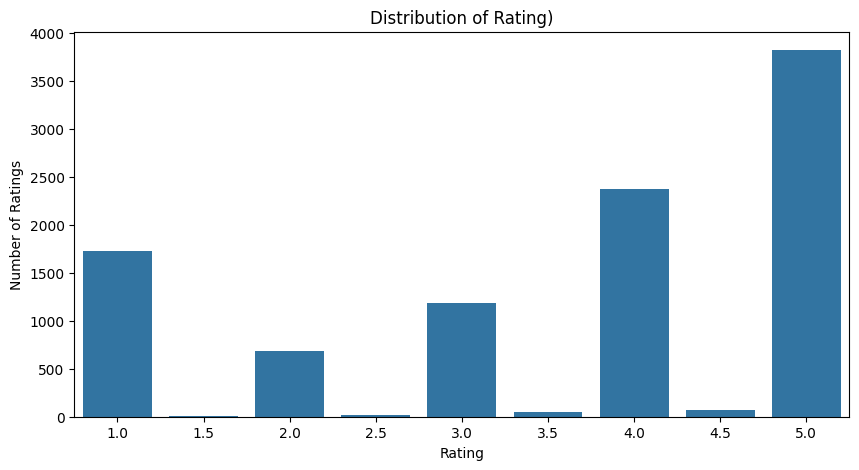

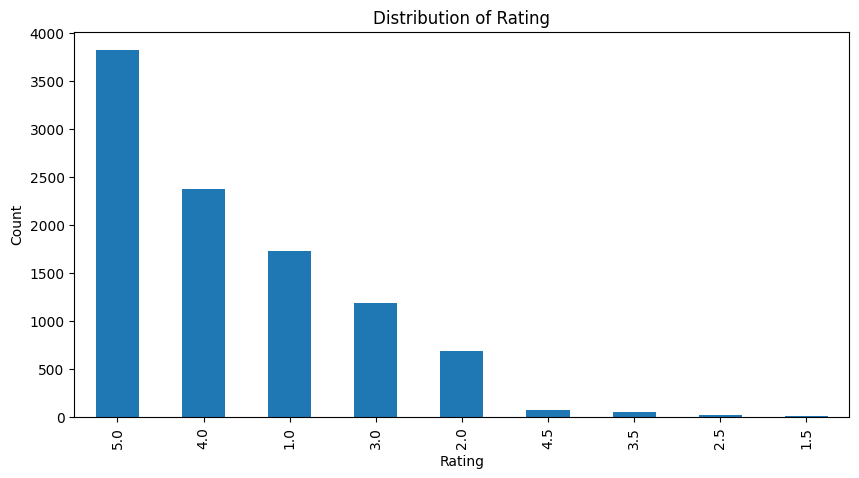

In [61]:
# prompt: Plot the distribution of all reviews and the distribution of sentiment.

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' DataFrame from the previous code is available

plt.figure(figsize=(10, 5))
sns.countplot(x='Rating', data=data)
plt.title('Distribution of Rating)')
plt.xlabel('Rating')
plt.ylabel('Number of Ratings')
plt.show()

# Distribution of sentiment (if 'Liked' column exists)
plt.figure(figsize=(10, 5))
data['Rating'].value_counts().plot(kind='bar')
plt.title('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [62]:
# Creating a wordcloud for negative values.

negative_reviews = data[data['Rating'] <3]
words = ' '.join(negative_reviews['Review'])
cleaned_word = " ".join([word for word in words.split()])

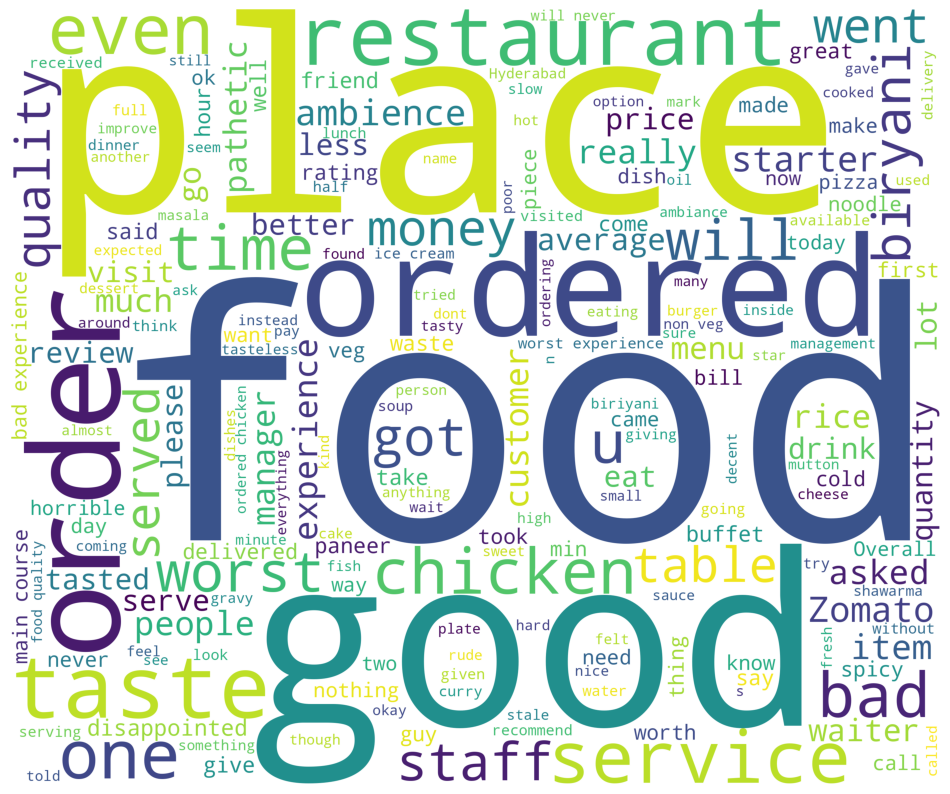

In [63]:
# Plotting the wordcloud
from wordcloud import WordCloud, STOPWORDS
wordcloud = WordCloud(stopwords = STOPWORDS,
                      background_color = 'white',
                      width = 3000,
                      height = 2500
                     ).generate(cleaned_word)

plt.figure(1, figsize = (12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

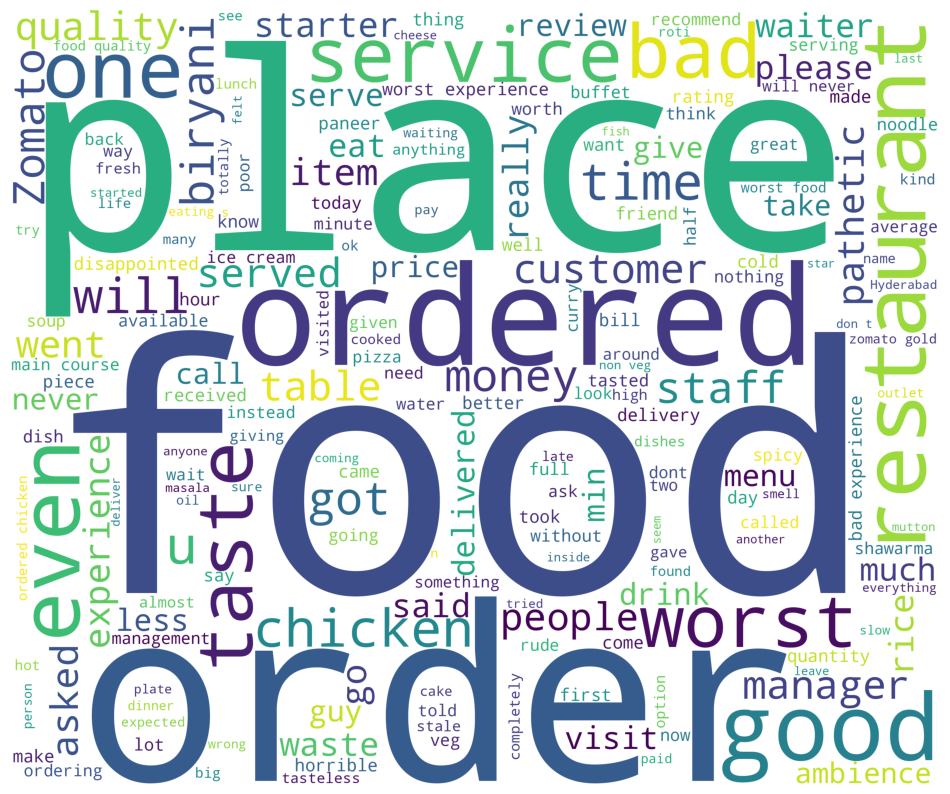

In [64]:
# For positive cases
positive_reviews = data[data['Rating'] == 1]
words = ' '.join(positive_reviews['Review'])
cleaned_word = " ".join([word for word in words.split()])

wordcloud = WordCloud(stopwords = STOPWORDS,
                      background_color = 'white',
                      width = 3000,
                      height = 2500
                     ).generate(cleaned_word)

plt.figure(1, figsize = (12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## Understanding Data Columns

In [65]:
# Reviewing lables
data['Rating'].unique()
# Viendo el % de las etiquetas
data['Rating'].value_counts(True)

,proportion
Rating,
5.0,0.384422
4.0,0.238392
1.0,0.174271
3.0,0.119698
2.0,0.068744
4.5,0.006935
3.5,0.004724
2.5,0.001910
1.5,0.000905


In [66]:
data['Pictures'].unique()

array([ 0,  8,  1,  7,  2,  6,  3,  5,  9,  4, 16, 26, 10, 15, 22, 11, 14,
       13, 21, 52, 18, 20, 27, 19, 12, 41, 42, 37, 28, 17, 25, 24, 34, 64,
       23, 32])

In [67]:
# Drop only existing columns
columns_to_drop = ['Metadata', 'Time', 'Pictures']
existing_columns = [col for col in columns_to_drop if col in data.columns]

data.drop(columns=existing_columns, inplace=True)

In [68]:
data.head()

,Review,Rating
0,"The ambience was good, food was quite good . had Saturday lunch , which was cost effective .\nGood place for a sate brunch. One can also chill with friends and or parents.\nWaiter Soumen Das was really courteous and helpful.",5.0
1,Ambience is too good for a pleasant evening. Service is very prompt. Food is good. Over all a good experience. Soumen Das - kudos to the service,5.0
2,A must try.. great food great ambience. Thnx for the service by Pradeep and Subroto. My personal recommendation is Penne Alfredo Pasta:) ....... Also the music in the background is amazing.,5.0
3,"Soumen das and Arun was a great guy. Only because of their behavior and sincerety, And good food off course, I would like to visit this place again.",5.0
4,Food is good.we ordered Kodi drumsticks and basket mutton biryani. All are good. Thanks to Pradeep. He served well. We enjoyed here. Ambience is also very good.,5.0


In [69]:
# Creando el lematizador

lm = WordNetLemmatizer()

In [70]:
#Let's implement a set of cleaning steps to enhance the quality of text to evaluate.
# NOTE: This step will take approximately 4 minutes.

final_corpus = []

for i in range(data.shape[0]):

    # Remove special characters and numbers from the data.
    review = re.sub('[^a-zA-Z]', ' ', data['Review'][i])

    # Converts to lowercase
    review = review.lower()

    review = review.split()

    # Remove accented words.
    review = [unidecode.unidecode(word) for word in review]

    # Remove stopwords and create lexical forms (lemmas) for each word present in each row.
    review = [lm.lemmatize(word) for word in review if not word in stopwords.words('english')]

    # Joining the corpus.
    review = ' '.join(review)

    # Añadiendo el resultado a una nueva lista llamada "final_corpus".
    final_corpus.append(review)

In [71]:
# Saving the cleaned text back into the reviews column.
data['Review'] = final_corpus

## Applying VADER and assessing performance

VADER (Valence Aware Dictionary and Sentiment Reasoner) is a lexicon- and rule-based sentiment analysis tool that not only provides scores for positivity and negativity of sentiment but also indicates the degree of positivity or negativity.

Let's create our VADER analyzer object called "sentiment".

In [72]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sentiment = SentimentIntensityAnalyzer()

In [73]:
# Now, let's create a copy of our dataset
data_new = data.copy()

In [74]:
# Calculate the polarity score of the reviews.
data_new['scores'] = data_new['Review'].apply(lambda text: sentiment.polarity_scores(text))
data_new.head()

,Review,Rating,scores
0,ambience good food quite good saturday lunch cost effective good place sate brunch one also chill friend parent waiter soumen da really courteous helpful,5.0,"{'neg': 0.0, 'neu': 0.44, 'pos': 0.56, 'compound': 0.9669}"
1,ambience good pleasant evening service prompt food good good experience soumen da kudos service,5.0,"{'neg': 0.0, 'neu': 0.37, 'pos': 0.63, 'compound': 0.936}"
2,must try great food great ambience thnx service pradeep subroto personal recommendation penne alfredo pasta also music background amazing,5.0,"{'neg': 0.0, 'neu': 0.571, 'pos': 0.429, 'compound': 0.9186}"
3,soumen da arun great guy behavior sincerety good food course would like visit place,5.0,"{'neg': 0.0, 'neu': 0.537, 'pos': 0.463, 'compound': 0.8591}"
4,food good ordered kodi drumstick basket mutton biryani good thanks pradeep served well enjoyed ambience also good,5.0,"{'neg': 0.0, 'neu': 0.393, 'pos': 0.607, 'compound': 0.9432}"


In [75]:
# Classify the review class by setting a threshold on the compound score and
# extract the compound score from the reviews.
data_new['compound']  = data_new['scores'].apply(lambda score_dict: score_dict['compound'])
data_new['comp_score'] = data_new['compound'].apply(lambda c: '1' if c >=0 else '0')
data_new.head()

## convert the Ratig columns to actual positive(1) and negative(0) values
data_new['Rating']=  data_new['Rating'].apply(lambda x : "1" if x>=3 else "0")
data_new.head()

,Review,Rating,scores,compound,comp_score
0,ambience good food quite good saturday lunch cost effective good place sate brunch one also chill friend parent waiter soumen da really courteous helpful,1,"{'neg': 0.0, 'neu': 0.44, 'pos': 0.56, 'compound': 0.9669}",0.9669,1
1,ambience good pleasant evening service prompt food good good experience soumen da kudos service,1,"{'neg': 0.0, 'neu': 0.37, 'pos': 0.63, 'compound': 0.936}",0.9360,1
2,must try great food great ambience thnx service pradeep subroto personal recommendation penne alfredo pasta also music background amazing,1,"{'neg': 0.0, 'neu': 0.571, 'pos': 0.429, 'compound': 0.9186}",0.9186,1
3,soumen da arun great guy behavior sincerety good food course would like visit place,1,"{'neg': 0.0, 'neu': 0.537, 'pos': 0.463, 'compound': 0.8591}",0.8591,1
4,food good ordered kodi drumstick basket mutton biryani good thanks pradeep served well enjoyed ambience also good,1,"{'neg': 0.0, 'neu': 0.393, 'pos': 0.607, 'compound': 0.9432}",0.9432,1


In [76]:
# Now we assign the VADER score to the original dataset "data"
data["VADER_pred"] = data_new['comp_score'].tolist()
data['Rating']= data_new['Rating'].tolist()
data.head()


,Review,Rating,VADER_pred
0,ambience good food quite good saturday lunch cost effective good place sate brunch one also chill friend parent waiter soumen da really courteous helpful,1,1
1,ambience good pleasant evening service prompt food good good experience soumen da kudos service,1,1
2,must try great food great ambience thnx service pradeep subroto personal recommendation penne alfredo pasta also music background amazing,1,1
3,soumen da arun great guy behavior sincerety good food course would like visit place,1,1
4,food good ordered kodi drumstick basket mutton biryani good thanks pradeep served well enjoyed ambience also good,1,1


              precision    recall  f1-score   support

           0       0.89      0.49      0.63      2446
           1       0.86      0.98      0.91      7504

    accuracy                           0.86      9950
   macro avg       0.87      0.74      0.77      9950
weighted avg       0.86      0.86      0.84      9950



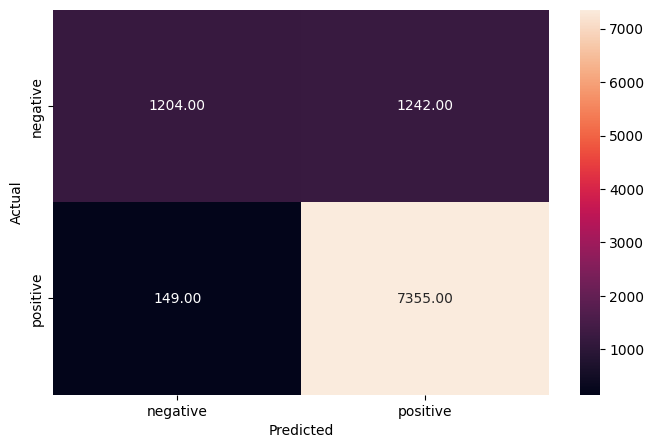

In [77]:
# This line converts the values of the sentiment column to integer data type (int).
data["Rating"] = data["Rating"].astype(int)

#This line converts the values in the sentiment column to integer data type (int).
data["VADER_pred"] = data["VADER_pred"].astype(int)

metric_score(data["Rating"], data["VADER_pred"])

 ## Applying Textblob and assessing performance

In [79]:
from textblob import TextBlob
data_new = data.copy()

# Calculate the polarity score of the reviews.
data_new['polarity']  = data_new['Review'].apply(lambda text: TextBlob(text).sentiment.polarity)

data_new.head()


,Review,Rating,VADER_pred,polarity
0,ambience good food quite good saturday lunch cost effective good place sate brunch one also chill friend parent waiter soumen da really courteous helpful,1,1,0.660000
1,ambience good pleasant evening service prompt food good good experience soumen da kudos service,1,1,0.708333
2,must try great food great ambience thnx service pradeep subroto personal recommendation penne alfredo pasta also music background amazing,1,1,0.550000
3,soumen da arun great guy behavior sincerety good food course would like visit place,1,1,0.750000
4,food good ordered kodi drumstick basket mutton biryani good thanks pradeep served well enjoyed ambience also good,1,1,0.560000


In [80]:
# Classify the review's category by setting a threshold on the polarity score.
data_new['polarity_score'] = data_new['polarity'].apply(lambda c: '1' if c >=0 else '0')

data_new.head()

,Review,Rating,VADER_pred,polarity,polarity_score
0,ambience good food quite good saturday lunch cost effective good place sate brunch one also chill friend parent waiter soumen da really courteous helpful,1,1,0.660000,1
1,ambience good pleasant evening service prompt food good good experience soumen da kudos service,1,1,0.708333,1
2,must try great food great ambience thnx service pradeep subroto personal recommendation penne alfredo pasta also music background amazing,1,1,0.550000,1
3,soumen da arun great guy behavior sincerety good food course would like visit place,1,1,0.750000,1
4,food good ordered kodi drumstick basket mutton biryani good thanks pradeep served well enjoyed ambience also good,1,1,0.560000,1


In [81]:
# Now let's bring the polarity score to our origibal dataset (data).

data["Text_Blob_pred"] = data_new['polarity_score'].tolist()
data.head()

,Review,Rating,VADER_pred,Text_Blob_pred
0,ambience good food quite good saturday lunch cost effective good place sate brunch one also chill friend parent waiter soumen da really courteous helpful,1,1,1
1,ambience good pleasant evening service prompt food good good experience soumen da kudos service,1,1,1
2,must try great food great ambience thnx service pradeep subroto personal recommendation penne alfredo pasta also music background amazing,1,1,1
3,soumen da arun great guy behavior sincerety good food course would like visit place,1,1,1
4,food good ordered kodi drumstick basket mutton biryani good thanks pradeep served well enjoyed ambience also good,1,1,1


              precision    recall  f1-score   support

           0       0.79      0.59      0.67      2446
           1       0.88      0.95      0.91      7504

    accuracy                           0.86      9950
   macro avg       0.83      0.77      0.79      9950
weighted avg       0.85      0.86      0.85      9950



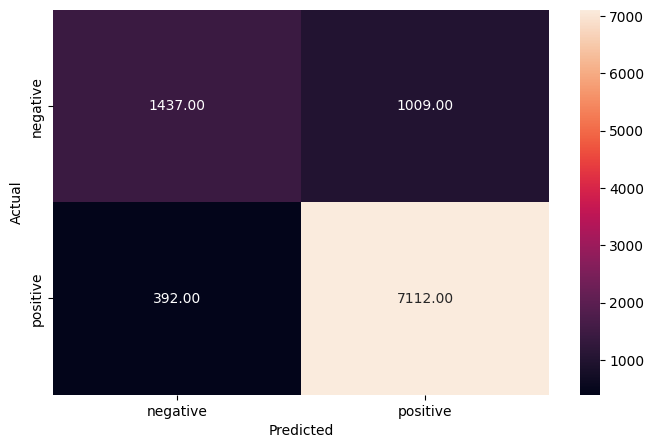

In [83]:
# Let's calculate nopw Accuracy and other metrics for the TextBlob score
data["Rating"] = data["Rating"].astype(int)
data["Text_Blob_pred"] = data["Text_Blob_pred"].astype(int)
metric_score(data["Rating"], data["Text_Blob_pred"])

## Conclusion

## Here, both the models gave the same accuracy of 86%, which is pretty good to predict the review of the reseturant

## **COMPLEMENTARY EXERCISE: Estimating the sentiment of your own text.**

Use this Gradio APP to evaluate the sentiment of your own text. Install Gradio and run the code section below. Then , insert your text and see the evaluation.

In [84]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 MB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.1/320.1 kB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 70.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.8/63.8 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 7.8 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [85]:
import gradio as gr
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

# Ensure the necessary NLTK data is downloaded
nltk.download('vader_lexicon')

# Initialize the VADER SentimentIntensityAnalyzer
vader_analyzer = SentimentIntensityAnalyzer()

# Define the sentiment analysis function
def analyze_sentiment(user_input):
    # VADER sentiment analysis
    vader_scores = vader_analyzer.polarity_scores(user_input)
    vader_polarity = vader_scores['compound']
    if vader_polarity > 0.05:
        vader_sentiment = "Positive"
    elif vader_polarity < -0.05:
        vader_sentiment = "Negative"
    else:
        vader_sentiment = "Neutral"

    # TextBlob sentiment analysis
    textblob_polarity = TextBlob(user_input).sentiment.polarity
    if textblob_polarity > 0:
        textblob_sentiment = "Positive"
    elif textblob_polarity < 0:
        textblob_sentiment = "Negative"
    else:
        textblob_sentiment = "Neutral"

    # Combine results
    result = f"""
    **VADER Sentiment Analysis:**
    - Polarity Score: {vader_polarity:.3f}
    - Sentiment: {vader_sentiment}

    **TextBlob Sentiment Analysis:**
    - Polarity Score: {textblob_polarity:.3f}
    - Sentiment: {textblob_sentiment}
    """
    return result

# Create the Gradio interface
interface = gr.Interface(
    fn=analyze_sentiment,
    inputs=gr.Textbox(lines=5, placeholder="Enter text to analyze sentiment here..."),
    outputs=gr.Markdown(),
    title="Sentiment Analysis with VADER and TextBlob",
    description="This app analyzes the sentiment of your input text using both VADER and TextBlob. Enter text and see the results below."
)

# Launch the Gradio app
interface.launch()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://c1c27a55d904ab1f58.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [88]:
from nbconvert import HTMLExporter
import nbformat

# Load the notebook
notebook_path = "/content/drive/MyDrive/sentimental_analysis/Resturantreview.ipynb"
output_html_path = "/content/drive/MyDrive/sentimental_analysis/shajuassingment.html"

with open(notebook_path) as f:
  notebook_content = nbformat.read(f, as_version=4)

# Convert to HTMl
html_exporter = HTMLExporter()
(body, resources) = html_exporter.from_notebook_node(notebook_content)

# save to HTML file
with open(output_html_path, 'w') as f:
  f.write(body)

In [87]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
